# MSiA 422 Homework 1 -- Parth Patel

## Excerise 1: Procedural vs Functional Programming

### Problem Def: Given a list of numbers and words, find the count of each element type in the list.

In [54]:
#Part i) Create a function the will randomly generate a list of N numbers and words. Numbers and words count are random and the order is random too.

import random, string

def list_generator(list_len):
    #randomly determine the number of words and numbers in the list
    num_words = random.randint(1,list_len)
    num_numbers = list_len - num_words
    
    #create an empty list to append values to
    L = []
    
    #generate a number (based on random num_words above) of random strings (real words not easily generated without external package)
    for i in range(num_words):
        L.append(''.join(random.choice(string.ascii_lowercase) for i in range(8)))
    
    #generate a number (based on random num_numbers above) of random integers
    counter = 0
    while counter < num_numbers:
        L.append(random.randint(0, 1000))
        counter+= 1
    
    #shuffle the list to create random order in outputted list
    random.shuffle(L)
    return L

#run the function to see an output
list_generator(10)

['kpjoanpx',
 124,
 80,
 550,
 665,
 'rtgsjzbq',
 'yofjlfyx',
 'jnjpbnif',
 945,
 'chpsltkz']

In [99]:
#Part ii a) calculate the desired output with a procedural code by using loops

def count_element_type_procedural(L):
    
    numbers_count = 0
    words_count = 0
    for item in L:
        if type(item) == str:
            tmp = item.split()
            words_count = words_count + len(tmp)
        else:
            numbers_count += 1
    
    print("Count of numbers: ", numbers_count)
    print("Count of words: ", words_count)
    
#run provided example case
count_element_type_procedural([2, 3, 'word', -1, 'python programming language', 9, 321])

Count of numbers:  5
Count of words:  4


In [174]:
#Part ii b) calculate the desired output with a Functional code by using list comprehension.
def count_element_type_functional(L):
    numbers_count = len([i for i in L if type(i)==int])
    words_count = sum([len(i.split()) for i in L if type(i)==str])
    
    print("Count of numbers: ", numbers_count)
    print("Count of words: ", words_count)

In [175]:
count_element_type_functional([2, 3, 'word', -1, 'python programming language', 9, 321])

Count of numbers:  5
Count of words:  4


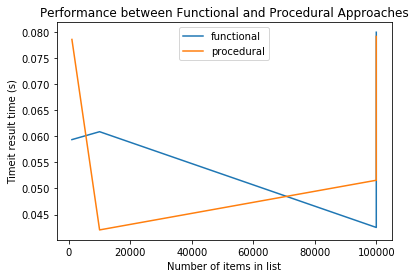

In [184]:
#Part iii Use TimeIt standard library and matplotlib to present the performance difference among the 2 solutions for different list sizes
import timeit 

def compare_times(method, N):
    func_in = "lambda: count_element_type_{}(list_generator({}))".format(method,N)
    time= timeit.timeit(func_in)
    return time

N_vals = [100, 1000, 10000, 100000]
func_times=[]
proc_times = []
for n in N_vals:
    func_times.append(compare_times('functional',n))
    proc_times.append(compare_times('procedural',n))
    
import matplotlib.pyplot as plt
plt.plot(N_vals,func_times, label = 'functional')
plt.plot(N_vals,proc_times, label = 'procedural')
plt.title("Performance between Functional and Procedural Approaches")
plt.xlabel("Number of items in list")
plt.ylabel("Timeit result time (s)")
plt.legend()
plt.show()

## Exercise 2 – Simple Student Grading System - memory based

### Problem Def: Create a data structure (dict!) to store the class related information.

Create a data structure (dict!) to store the class related information.

In [280]:
import csv
with open("exams.csv", 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    student_dict = []
    for row in reader:
        row['final_score'] = 0.4*float(row['Exams'])+0.3*float(row['Quizzes'])+0.3*float(row['Projects'])
        if (row['final_score'] >= 90):
            row['letter_grade'] = 'A'
        elif (row['final_score'] >= 80) & (row['final_score'] < 90):
            row['letter_grade'] = 'B'
        elif (row['final_score'] >= 20) & (row['final_score'] < 80):
            row['letter_grade'] = 'C'
        elif (row['final_score'] >= 10) & (row['final_score'] < 20):
            row['letter_grade'] = 'D'
        else:
            row['letter_grade'] = 'F'
        student_dict.append(row)

In [281]:
student_dict

[OrderedDict([('id', 'ID1'),
              ('Name', 'James'),
              ('Quizzes', '43'),
              ('Projects', '51'),
              ('Exams', '55'),
              ('final_score', 50.199999999999996),
              ('letter_grade', 'C')]),
 OrderedDict([('id', 'ID2'),
              ('Name', 'Josephine'),
              ('Quizzes', '76'),
              ('Projects', '84'),
              ('Exams', '87'),
              ('final_score', 82.80000000000001),
              ('letter_grade', 'B')]),
 OrderedDict([('id', 'ID3'),
              ('Name', 'Art'),
              ('Quizzes', '89'),
              ('Projects', '94'),
              ('Exams', '92'),
              ('final_score', 91.7),
              ('letter_grade', 'A')]),
 OrderedDict([('id', 'ID4'),
              ('Name', 'Lenna'),
              ('Quizzes', '70'),
              ('Projects', '67'),
              ('Exams', '64'),
              ('final_score', 66.7),
              ('letter_grade', 'C')]),
 OrderedDict([('id', 'ID5')

Provide the system user with a console based menu as defined in assignment

In [273]:
def print_menu(): 
    print(25 * "-" , "MENU" , 25 * "-")
    print("1. Load data set from exams.csv file")
    print("2. Print a list of student names, final scores,\n   and letter grades sorted by names")
    print("3. Print score summary")
    print("4. Identify +2 sigma students")
    print("5. Plot a pie chart of final grades distribution")
    print("6. Compute box plot params (min, max, median, Q1, Q3)")
    print("7. Exit system")
    print(57 * "-")

In [274]:
print_menu()

------------------------- MENU -------------------------
1. Load data set from exams.csv file
2. Print a list of student names, final scores,
   and letter grades sorted by names
3. Print score summary
4. Identify +2 sigma students
5. Plot a pie chart of final grades distribution
6. Compute box plot params (min, max, median, Q1, Q3)
7. Exit system
---------------------------------------------------------


In [ ]:
while loop:
    print_menu()
    selection = input("Enter your choice [1-7]: ")
    if selection==1:     
        menu1()
        ## You can add your code or functions here
    elif selection==2:
        menu2()
        ## You can add your code or functions here
    elif selection==3:
        print "Menu 3 has been selected"
        ## You can add your code or functions here
    elif selection==4:
        print "Menu 4 has been selected"
        ## You can add your code or functions here
    elif selection==5:
        print "Menu 5 has been selected"
    elif selection==6:
        print "Menu 5 has been selected"
    elif selection==7:
        print "Menu 5 has been selected"
    else

In [315]:
#ask TA if this is what is desired or if 'load' data for option 1 means into a dict
def menu1():
    f = open('exams.csv')
    data =f.readlines()
    print(data)

In [316]:
def menu2():
    student_sorted_dict = sorted(student_dict, key=lambda x: x['Name']) 
    print('Below is a list of lists containing: Name, Final Score, Letter Grade')
    [[d['Name'],d['final_score'],d['letter_grade']] for d in student_sorted_dict]

In [356]:
def get_mode(list_in):
    a= [(list_in.count(x),x) for x in list_in]
    max_occur= max(a)[0]
    max_tuples = [item for item in a if item[0] == max_occur]
    modes = [x[1] for x in max_tuples]
    print('Modes are:', modes, 'they each occur', max_occur, 'times')

In [357]:
def menu3():

    import statistics as stats

    final_scores=[d['final_score'] for d in student_sorted_dict]
    print('Number of students is: ',len(final_scores))
    print('Min Final Score is : ',round(min(final_scores),ndigits=2))
    print('Max Final Score is : ',max(final_scores))
    print('Mean of Final Scores is : ',round(stats.mean(final_scores),ndigits=2))
    print('Median of Final Scores is : ',stats.median(final_scores))
    ##mode doesnt work cause multiple solutions
    try:
        print('Mode of Final Scores is : ',stats.mode(final_scores))
    except stats.StatisticsError:
        get_mode(final_scores)
    print('Std dev of Final Scores is : ',round(stats.stdev(final_scores),ndigits=2))